***
$\mathbf{\text{Gradient-Descent: The Inferstructure of Deep Learning}}$<br>
***
#### **Preface:**
* Welcome to the first module of the course which is based on the most tricky concepts of mathematics that are quite essential in the area of machine learning and deep learning including Taylor Series, Newton method, **Gradient Descent**, linear regression, and logistic regression.

* Through this course, it is supposed that you are already familiar with some of the basic concepts of multivariate calculus such as derivatives, differentiating, Jacobian, gradient, and Hessian. If you have not had any acquaintance with mentioned concepts, don't panic. Fortunately, there are a bunch of really good resources in this area throughout the internet. Additionally, there are some useful links at the end of the file "README.md" which help you easily find what you need to acquire a comprehensive understanding of this module.


#### **Gradient Descent Definition:**

* In brief, Gradient Descent is a breakthrough approach that allows us to find the fastest and steepest way up to the hill. It is somehow a generalized form of Newton-Raphson Method that does something similar with a multi-dimensional problem. If you aren't familiar with this method, you can find the notebook explaining this method in the current repository. Gradient Descent, like Newton-Raphson method, enables us to extrapolate a function to find the solution without evaluating it at each possible point. Sometimes our data is produced by a supercomputer or our data is multi-dimensional with maybe thousands of dimensions, so it is not possible to evaluate each of our data points and then sort them, and find the maxima or minima.

#### **What does Gradient Descent do?**

* Consider the function $f(x,y) = x^2y$. We already know that Newton Raphson Method does not help us when we are facing a multi-dimensional problem. As a result, our only option would be to apply Gradient Descent instead. Before getting stuck in mathematics, we must introduce you to Grad which is denoted by $\nabla f$. In fact, it is a vector that each of its components is the derivative of the function $f$ with respect to each of the variables. For instance, when $f(x,y) = x^2y$, we have:
$$Grad\space f:  \nabla f = \begin{bmatrix}
\frac{∂f}{∂x}\\\frac{∂f}{∂y}\end{bmatrix}$$

* In this expression, $\frac {\partial f}{\partial x}$ means that we must differentiate $f(x,y)$ with respect to x and treat the other variables as constants, and $\frac {\partial f}{\partial x}$ means that we must differentiate $f(x,y)$ with respect to y and treat the other variables as constants. As a result, we will have:

<center>Consider $f(x,y) = x^2y$ :</center>
</br>

$$\nabla f = \begin{bmatrix}
\frac{∂f}{∂x}\\\frac{∂f}{∂y}\end{bmatrix} = \begin{bmatrix}
2xy\\x^2\end{bmatrix}$$

* In fact, Grad is a vector pointing up the hill along the fastest and steepest direction. Grad is a little vector that combines linear algebra and calculus. It is enough to give it the point (a,b) in space then it returns a little vector pointing up the maxima at that particular point. However, as you can see, in the above formula, there is no room for an input point (a,b), so we should change it a bit:<br>

<center>At the point $(a,b)$ :</center>

$$\nabla f = \begin{bmatrix}
\frac{∂f}{∂x}(a,b)\\\frac{∂f}{∂y}(a,b)\end{bmatrix} $$

* Now that We got acquainted with Grad, we can continue and see the Gradient Descent formula as follows:

$$X_{i+1} = X_i- γ \nabla f(a_{x_i},b_{x_i})$$

<center> $X_i$ :our initial guess, <br> $(a_{x_i},b_{x_i})$ : the coordinate of our initial guess <br> $X_{i+1}$ : the next estimated point<br>"γ": a coefficient to control the size of our steps</center>
<br>

* It is the time to pass the boring theoretical lessons and see what is happening in practice.


***
$\mathbf{\text{Practice One: }}$<br>
***
#### **Use Gradient Descent to find the Minimum point of the function.**
 $$f(x,y)= xe^{-(x^2+y^2)}$$

####**Let's first plot the function in a 3D space:**
* As you can see, the minimum point is approximately about $$(x,y)=(0.75,0)$$

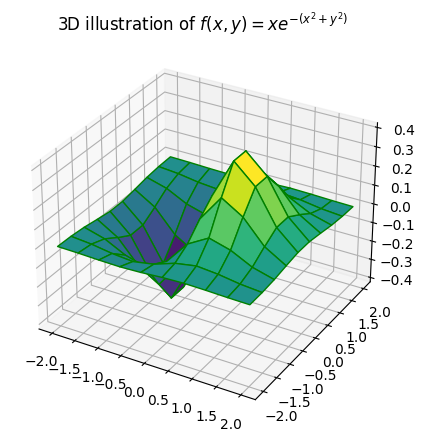

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

# The function f(x,y) = 𝑒^−(𝑥^2+𝑦^2)
#>>>>>>>>>>>>>>>>>>>>>>>>>
fxy = lambda x,y: x * np.e**(-(x**2+y**2))
#<<<<<<<<<<<<<<<<<<<<<<<<<

# defining surface and axes
x = np.outer(np.linspace(-2, 2, 10), np.ones(10))
y = x.copy().T

#Plotting Configuration
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, fxy(x,y), cmap='viridis',edgecolor='green')
ax.set_title('3D illustration of $f(x,y)= xe^{-(x^2+y^2)}$')
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100
plt.show()

* **We want to plot all the contours of the function on the plane $(x,y)$**
* You can see the way that our Gradient Descent method has found when the initial geuss is located at the coordinate $x_i = (0.70,0.1) \space ,and \space γ=1 $. In the next cell, we apply the method to our fuction at three various initial points to see what will happen.

,X_i,X_next
0,"(0.7, 0.1)","[0.6879, 0.1849]"
1,"[0.6879, 0.1849]","[0.6556, 0.3381]"
2,"[0.6556, 0.3381]","[0.5741, 0.5954]"
3,"[0.5741, 0.5954]","[0.4021, 0.9403]"
4,"[0.4021, 0.9403]","[0.1643, 1.206]"
5,"[0.1643, 1.206]","[-0.0507, 1.2961]"
6,"[-0.0507, 1.2961]","[-0.2357, 1.2717]"
7,"[-0.2357, 1.2717]","[-0.4026, 1.1592]"
8,"[-0.4026, 1.1592]","[-0.5525, 0.9521]"
9,"[-0.5525, 0.9521]","[-0.6684, 0.6389]"


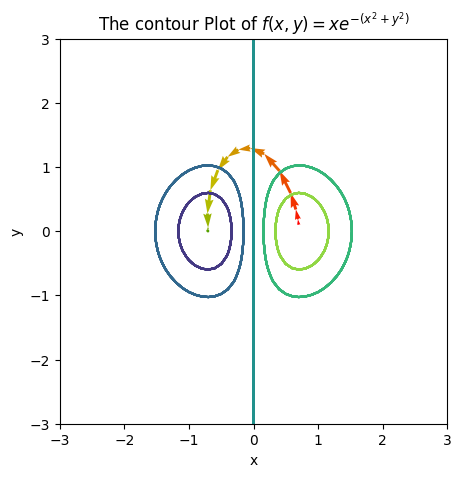

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import pandas as pd

from colour import Color
red = Color("red")
colors = [i.get_rgb() for i in list(red.range_to(Color("green"),20))]


fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
fig.set_dpi(100)



def contour_plotter(z):
  feature_x = np.arange(-50, 50, 0.1)
  feature_y = np.arange(-50, 50, 0.1)
  levels = np.arange(-2, 2, 0.08)
  [x, y] = np.meshgrid(feature_x, feature_y)
  ax.contour(x,y,z(x,y))
  ax.set_title('The contour Plot of $f(x,y)= xe^{-(x^2+y^2)}$')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_xlim((-3,3))
  ax.set_ylim((-3,3))

def vector_plotter(results,i):
  ax.quiver(results[i]["X_i"][0], results[i]["X_i"][1] , results[i]["X_next"][0]-\
   (results[i]["X_i"][0]), results[i]["X_next"][1]-(results[i]["X_i"][1]), color=colors[i], units='xy', scale=1)



#>>>>>>>>>>>>Gradient Descent Expression
results = []
fxy = lambda x,y : x * np.e**(-(x**2+y**2))
dfx = lambda x,y : (np.math.e**(-x**2-y**2))-(2*x**2*((np.math.e**(-x**2-y**2))))
dfy = lambda x,y : -2*x*y*(np.math.e**(-x**2-y**2))
fxy_prime = lambda x,y : np.array([dfx(x,y),dfy(x,y)])
x_next = lambda x_i,gama: x_i - gama * (fxy_prime(x_i[0],x_i[1]))
gama = 1
#<<<<<<<<<<<<<<<end

#>>>>>>>>initnial guess
x_i = (0.70,0.1)
#<<<<<<<<end


#>>>>>>>>>>>> Iteration Section
for i in range(20):
  t = {"X_i":x_i}
  x_i =  np.round(x_next(x_i,gama),4)
  t["X_next"]=x_i
  results.append(t)
  contour_plotter(fxy)
  vector_plotter(results,i)
  fig.show()

  if round(np.linalg.norm(t["X_next"]-t["X_i"]),2) == 0:
    break


#<<<<<<<<<<<END

display(pd.DataFrame(results))



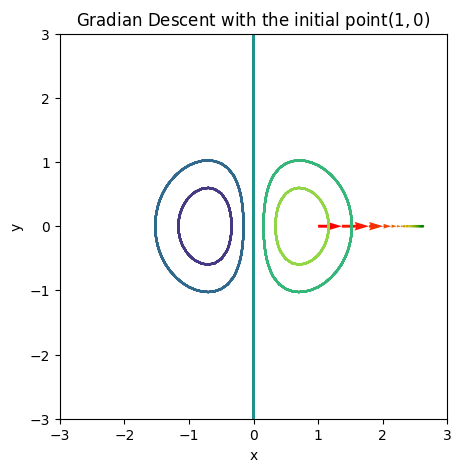

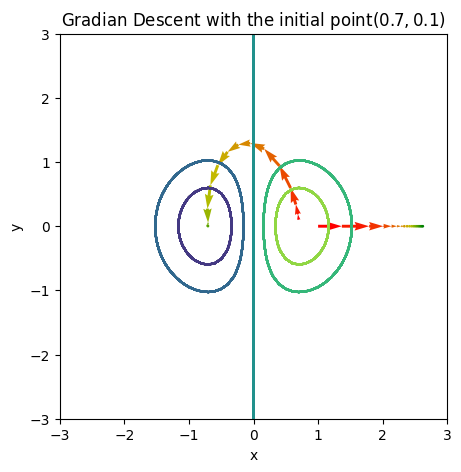

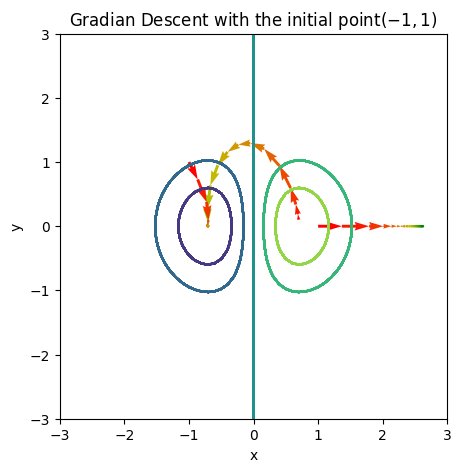

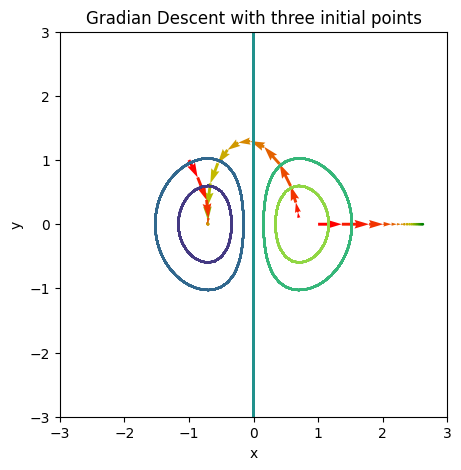

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import pandas as pd

from colour import Color
red = Color("red")
colors = [i.get_rgb() for i in list(red.range_to(Color("green"),20))]


fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
fig.set_dpi(100)



def contour_plotter(z):
  feature_x = np.arange(-50, 50, 0.1)
  feature_y = np.arange(-50, 50, 0.1)
  levels = np.arange(-2, 2, 0.08)
  [x, y] = np.meshgrid(feature_x, feature_y)
  ax.contour(x,y,z(x,y))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_xlim((-3,3))
  ax.set_ylim((-3,3))

def vector_plotter(results,i):
  ax.quiver(results[i]["X_i"][0], results[i]["X_i"][1] , results[i]["X_next"][0]-\
   (results[i]["X_i"][0]), results[i]["X_next"][1]-(results[i]["X_i"][1]), color=colors[i], units='xy', scale=1)




#>>>>>>>>>>>>Gradient Descent Expression
results = []
fxy = lambda x,y : x * np.e**(-(x**2+y**2))
dfx = lambda x,y : (np.math.e**(-x**2-y**2))-(2*x**2*((np.math.e**(-x**2-y**2))))
dfy = lambda x,y : -2*x*y*(np.math.e**(-x**2-y**2))
fxy_prime = lambda x,y : np.array([dfx(x,y),dfy(x,y)])
x_next = lambda x_i,gama: x_i - gama * (fxy_prime(x_i[0],x_i[1]))
gama = 1
#<<<<<<<<<<<<<<<end

#>>>>>>>>initnial estimates
var_x_i = [(1,0),(0.7,0.1),(-1,1)]
#<<<<<<<<end


#>>>>>>>>>>>> Iteration Section
for x_i in var_x_i:
  results = []
  ax.set_title('Gradian Descent with the initial point$'+str(x_i)+'$')
  for i in range(20):
    t = {"X_i":x_i}
    x_i =  np.round(x_next(x_i,gama),6)
    t["X_next"]=x_i
    results.append(t)
    contour_plotter(fxy)
    vector_plotter(results,i)

    if round(np.linalg.norm(t["X_next"]-t["X_i"]),2) == 0:
      break
  display(fig)
  print("======================================================================")

_= ax.set_title('Gradian Descent with three initial points')


#<<<<<<<<<<<END





* **We want to plot all the contours of the function on the plane $(x,y)$**
* You can see the way that our Gradient Descent method has found when the initial geuss is located at the coordinate $x_i = (0.70,0.1) \space ,and \space γ=1 $. In the next cell, we apply the method to our fuction at three various values of $γ$ to see what will happen.

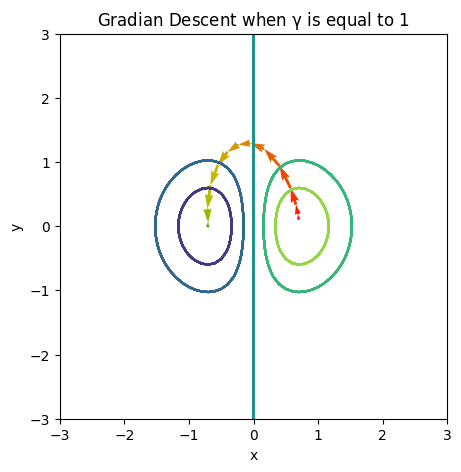

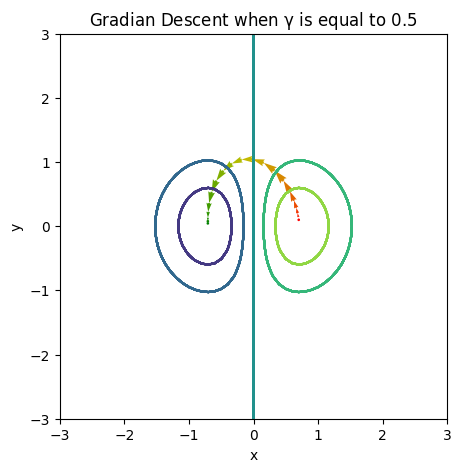

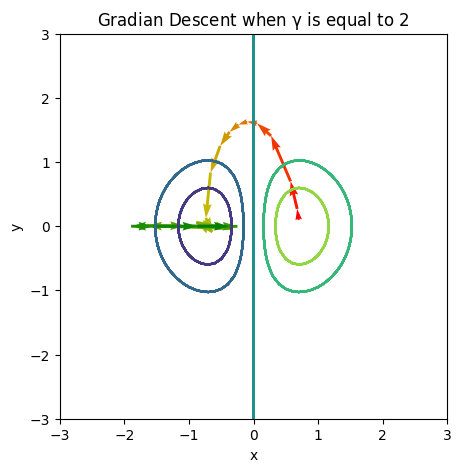

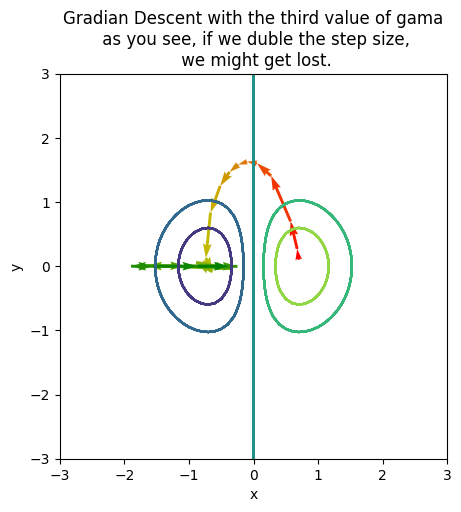

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import pandas as pd

from colour import Color
red = Color("red")
colors = [i.get_rgb() for i in list(red.range_to(Color("green"),20))]


fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
fig.set_dpi(100)



def contour_plotter(z):
  feature_x = np.arange(-50, 50, 0.1)
  feature_y = np.arange(-50, 50, 0.1)
  levels = np.arange(-2, 2, 0.08)
  [x, y] = np.meshgrid(feature_x, feature_y)
  ax.contour(x,y,z(x,y))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_xlim((-3,3))
  ax.set_ylim((-3,3))

def vector_plotter(results,i):
  ax.quiver(results[i]["X_i"][0], results[i]["X_i"][1] , results[i]["X_next"][0]-\
   (results[i]["X_i"][0]), results[i]["X_next"][1]-(results[i]["X_i"][1]), color=colors[i], units='xy', scale=1)




#>>>>>>>>>>>>Gradient Descent Expression
results = []
fxy = lambda x,y : x * np.e**(-(x**2+y**2))
dfx = lambda x,y : (np.math.e**(-x**2-y**2))-(2*x**2*((np.math.e**(-x**2-y**2))))
dfy = lambda x,y : -2*x*y*(np.math.e**(-x**2-y**2))
fxy_prime = lambda x,y : np.array([dfx(x,y),dfy(x,y)])
x_next = lambda x_i,gama: x_i - gama * (fxy_prime(x_i[0],x_i[1]))
gama_list = [1,0.5,2]
#<<<<<<<<<<<<<<<end




#>>>>>>>>>>>> Iteration Section
for gama in gama_list:
  results = []
  #>>>>>>>>initnial guess
  x_i = (0.7,0.1)
  #<<<<<<<<end
  ax.clear()
  ax.set_title('Gradian Descent when γ is equal to $'+str(gama)+'$')
  for i in range(20):
    t = {"X_i":x_i}
    x_i =  np.round(x_next(x_i,gama),6)
    t["X_next"]=x_i
    results.append(t)
    contour_plotter(fxy)
    vector_plotter(results,i)

    if round(np.linalg.norm(t["X_next"]-t["X_i"]),2) == 0:
      break
  display(fig)
  print("======================================================================")

_= ax.set_title('Gradian Descent with the third value of gama\n as you see, if we double the step size,\n we might get lost.')



#<<<<<<<<<<<END





#**SEE YOU THEN....**